# CUSTOMER ANALYSIS - Data preprocess

Using k-means algorithm :

1) Evaluate clustering results (silhouette score) between original and normalized/standardized data.

2) Cluster number optimization (camparison between original and normalized/standardized data).

Conclusion :
1) 2 clusters ; Original score : 0.63 / Standardized score : 0.23 // 3 clusters ; Original score : 0.59 / Standardized score : 0.16

2) Clusters : 2/3

## LIBRARIES IMPORT

In [1]:
# Data process
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler, MaxAbsScaler


# ML
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

## DATA IMPORT

Get data from csv

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

## DATA EXPLORATION

See what does data look like

In [3]:
#df.head()

## DATA PREPROCESSING

### Preprocess data according to data viz observations

In [4]:
df_p = df.drop(df[df.Year_Birth < 1920].index)

In [5]:
df_p.drop(df[df.Marital_Status =='Absurd'].index, inplace = True)
df_p.drop(df[df.Marital_Status =='YOLO'].index, inplace = True)
df_p.replace('Alone', 'Single', inplace = True)

In [6]:
df_p.drop(df[df.Income == 666666].index, inplace = True)

In [7]:
df_p.dropna(inplace=True)

In [8]:
def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())

df_p['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True).apply(convert_to_timestamp)

In [9]:
df_p.dropna(inplace=True)

In [10]:
df_p.reset_index(inplace = True, drop = True)

### Features selection and encoding

Get columns names to slice df to X below

In [11]:
#col = df.columns
#col

Slice df to define X_1, matrix of numerical features

In [12]:
X_1 = df_p[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]
#X_1

Label encode Education and Marital Status features

In [13]:
le = LabelEncoder()

In [14]:
edu = le.fit_transform(df_p['Education'])
#edu

In [15]:
marit = le.fit_transform(df_p['Marital_Status'])
#marit

Definition of df X_2, matrix of encoded features

In [16]:
X_2 = pd.concat([pd.DataFrame(edu.reshape((-1, 1))), pd.DataFrame(marit.reshape((-1, 1)))], axis = 1)
X_2.columns = ['Education', 'Marital_Status']
#X_2

Definition of X, matrix of all features

In [17]:
X = pd.concat([X_1, X_2], axis = 1)
#X

### Features Standardization

In [18]:
#X_n = pd.DataFrame(normalize(X, axis = 0), columns = X.columns)
scaler = StandardScaler()
#scaler = MaxAbsScaler()

#scaler

In [19]:
#X.head()

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2208 non-null   int64  
 1   Income               2208 non-null   float64
 2   Kidhome              2208 non-null   int64  
 3   Teenhome             2208 non-null   int64  
 4   Dt_Customer          2208 non-null   float64
 5   Recency              2208 non-null   int64  
 6   MntWines             2208 non-null   int64  
 7   MntFruits            2208 non-null   int64  
 8   MntMeatProducts      2208 non-null   int64  
 9   MntFishProducts      2208 non-null   int64  
 10  MntSweetProducts     2208 non-null   int64  
 11  MntGoldProds         2208 non-null   int64  
 12  NumDealsPurchases    2208 non-null   int64  
 13  NumWebPurchases      2208 non-null   int64  
 14  NumCatalogPurchases  2208 non-null   int64  
 15  NumStorePurchases    2208 non-null   i

In [21]:
X_n = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
#X_n.head()

## CLASSIFICATION

### Cluster number optimization

In [22]:
sse_orig = []
for k in range(1, 20):
    model_km = KMeans(n_clusters=k)
    model_km.fit(X)
    sse_orig.append(model_km.inertia_)

C:\Users\utile\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [23]:
sse_n = []
for k in range(1, 20):
    model_km = KMeans(n_clusters=k)
    model_km.fit(X_n)
    sse_n.append(model_km.inertia_)

C:\Users\utile\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [24]:
cluster_orig_df = pd.DataFrame({'Cluster':range(1, 20), 'sse':sse_orig})
cluster_n_df = pd.DataFrame({'Cluster':range(1, 20), 'sse':sse_n})

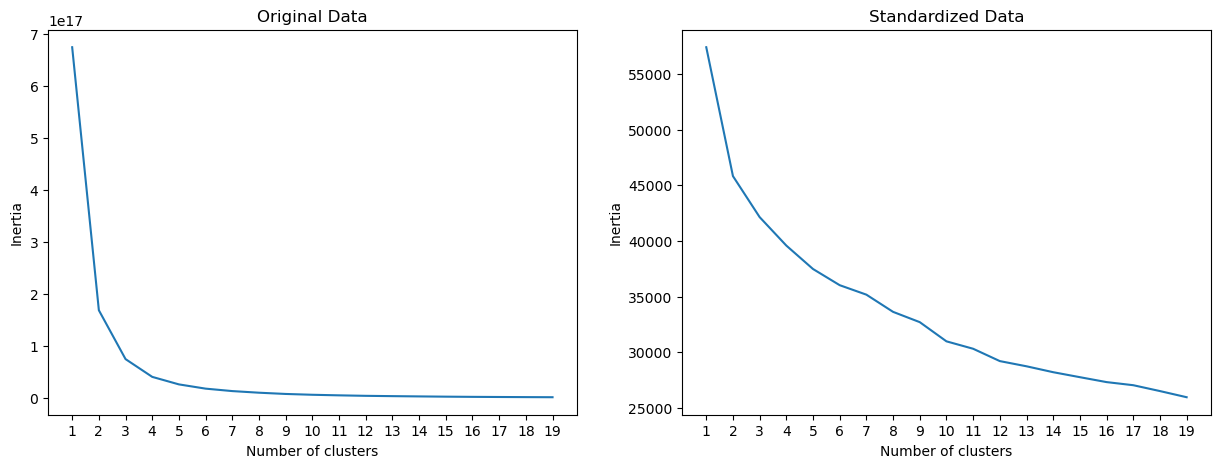

In [25]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.plot(cluster_orig_df['Cluster'], cluster_orig_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_orig_df['Cluster'])


plt.subplot(1, 2, 2)
plt.title('Standardized Data')
plt.plot(cluster_n_df['Cluster'], cluster_n_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_n_df['Cluster'])


plt.show()

In [26]:
n_clusters = 3
random_state = 130

### Train

In [27]:
model_orig = KMeans(n_clusters = n_clusters, random_state = random_state)
model_n = KMeans(n_clusters = n_clusters, random_state = random_state)

In [28]:
#model.get_params()

In [29]:
model_orig.fit(X)
model_n.fit(X_n)

KMeans(n_clusters=3, random_state=130)

In [30]:
#model.inertia_

In [31]:
y_pred_orig = model_orig.predict(X)
 
pd.DataFrame(y_pred_orig, columns=['y_pred']).value_counts()

y_pred
1         757
2         757
0         694
dtype: int64

In [32]:
y_pred_n = model_n.predict(X_n)

pd.DataFrame(y_pred_n, columns=['y_pred']).value_counts()

y_pred
0         1022
2          640
1          546
dtype: int64

In [33]:
#model.cluster_centers_

In [34]:
centers_orig = pd.DataFrame(model_orig.cluster_centers_, columns = X.columns)
centers_orig.sort_values('Year_Birth', inplace = True)
centers_orig = centers_orig.astype(int)
centers_orig

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
2,1968,52186,0,0,1374184067,49,289,23,157,34,...,5,0,0,0,0,0,0,0,2,1
0,1968,53081,0,0,1394301947,48,248,24,153,33,...,4,0,0,0,0,0,0,0,2,1
1,1969,50657,0,0,1353613872,49,372,30,188,44,...,6,0,0,0,0,0,0,0,2,1


In [35]:
centers_n = pd.DataFrame(model_n.cluster_centers_, columns = X.columns)
centers_n

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
0,0.255155,-0.799749,0.661044,-0.124092,0.156701,0.007279,-0.781609,-0.534319,-0.639239,-0.553393,...,0.474650,0.005813,-0.257137,-0.279508,-0.257178,-0.100459,0.028327,-0.156803,-0.107004,-0.004726
1,-0.013597,1.152336,-0.748969,-0.653620,-0.002730,0.016562,0.917677,1.063888,1.343056,1.150240,...,-1.050669,0.046879,0.205667,0.787231,0.652695,0.183224,-0.056944,0.421468,-0.049196,0.062680
2,-0.395850,0.294013,-0.416641,0.755779,-0.247902,-0.025753,0.465240,-0.054390,-0.125010,-0.097599,...,0.138395,-0.049277,0.235156,-0.225266,-0.146149,0.004108,0.003346,-0.109170,0.212842,-0.045928


In [36]:
centers_r = pd.DataFrame(scaler.inverse_transform(centers_n), columns = X.columns)
centers_r.sort_values('Year_Birth', inplace = True)
centers_r = centers_r.astype(int)
centers_r

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education,Marital_Status
2,1964,58274,0,0,1369120027,48,462,24,138,32,...,5,0,0,0,0,0,0,0,2,1
1,1968,76755,0,0,1373407232,49,614,68,468,100,...,2,0,0,0,0,0,0,0,2,1
0,1971,34723,0,0,1376195132,49,41,5,23,7,...,6,0,0,0,0,0,0,0,2,1


### Evaluation

In [37]:
#model.labels_

In [38]:
sil_orig = silhouette_score(X, model_orig.labels_)
round(sil_orig, 2)

0.59

In [39]:
sil_n = silhouette_score(X_n, model_n.labels_)
round(sil_n, 2)

0.16